In [54]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
import graphviz 
from graphviz import graphviz_layout

ImportError: cannot import name 'graphviz_layout'

In [55]:
import csv
import networkx as nx

In [68]:
g=nx.read_edgelist("Text3.txt",create_using=nx.DiGraph(), nodetype = str)

In [69]:
g.number_of_nodes()

327

In [70]:
g

C:\Users\Connor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Connor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Connor\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Connor\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

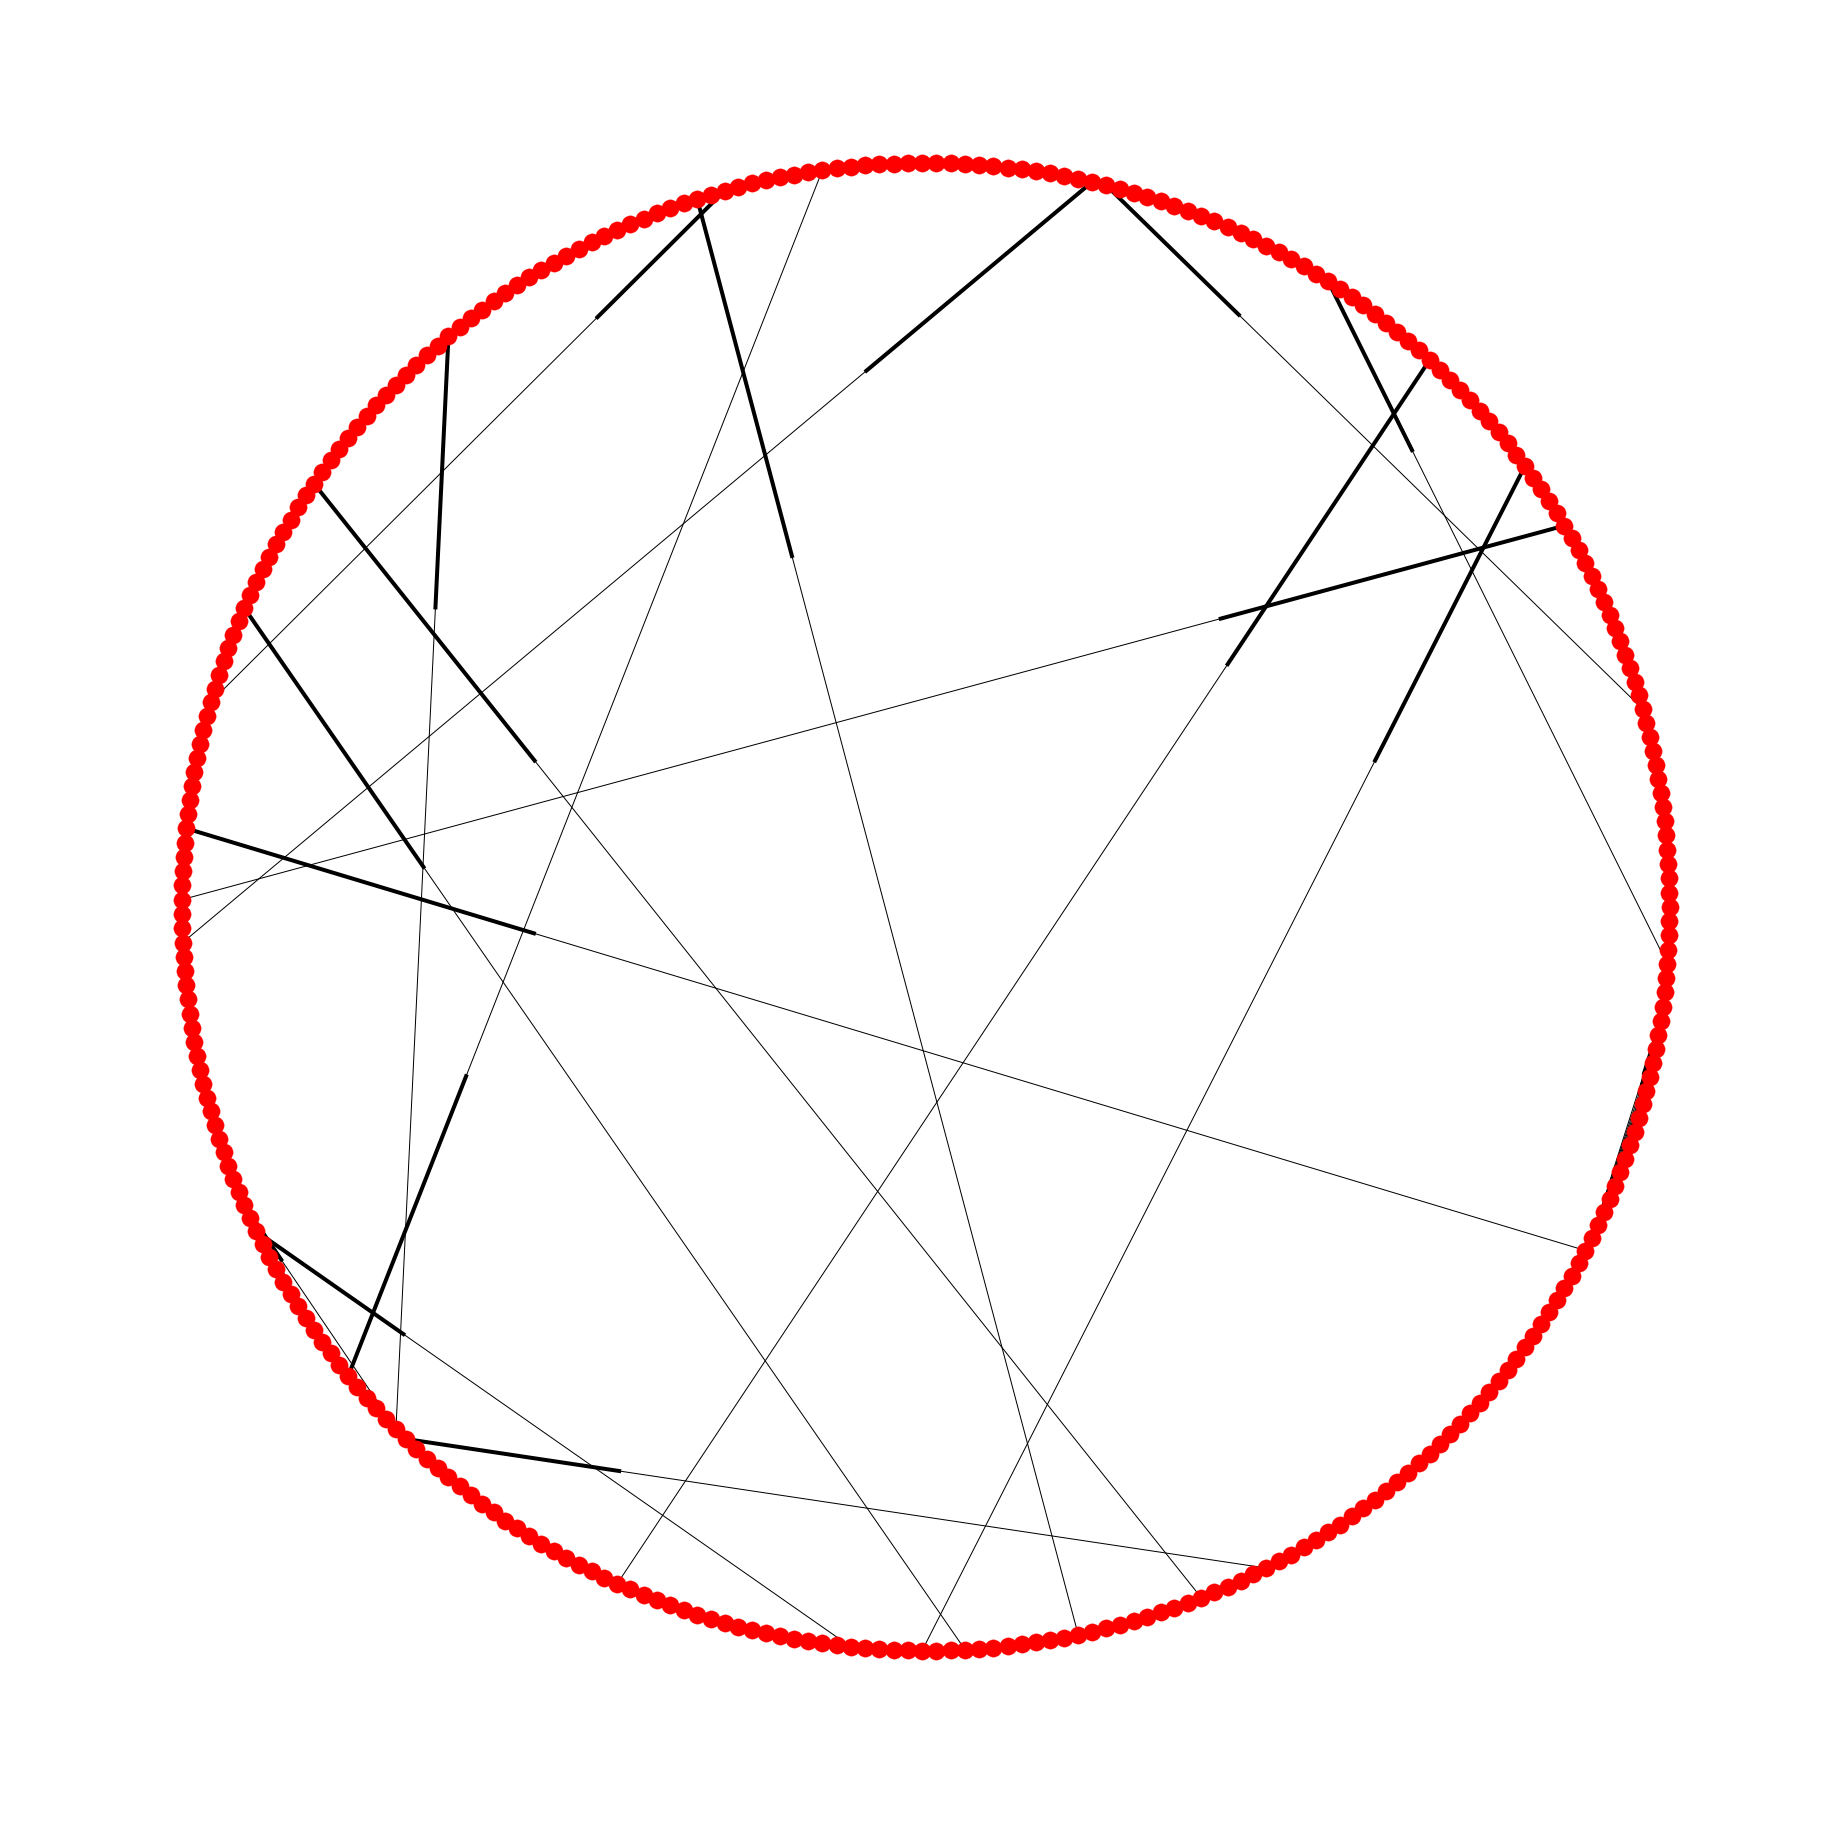

In [88]:
plt.rcParams['figure.figsize']=[25,25]
nx.draw(g,
                 pos = nx.circular_layout(g,scale=2), 
                 #node_color='lightblue',
                 #edge_color='gray',
                 #node_size=100,
                 #with_labels=False,
                 #alpha=.8
                 )
plt.axis('off')
plt.show()

In [63]:
numberofnodes= g.number_of_nodes()

This graph has 327 nodes and 225 edges.
The median degree is 1.0 and the mean degree is 1.3761467889908257.
A disease node with median degree is connected to 0.3058103975535168% of other diseases.


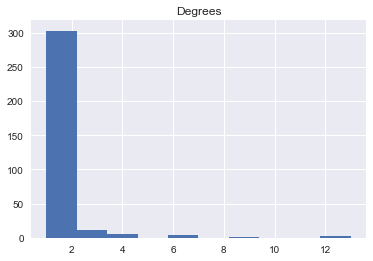

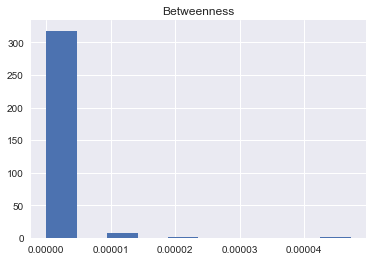

In [72]:
numberofnodes= g.number_of_nodes()
nodedegrees=list(g.degree().values())
#clustering=list(nx.clustering(g).values())
av_degree=np.mean(nodedegrees)
med_degree=np.median(nodedegrees)
betweenness_cent=list(nx.betweenness_centrality(g).values())
#componentsizes=[len(c) for c in sorted(nx.connected_components(diseases), key=len, reverse=True)]

print("This graph has {} nodes and {} edges.".format(g.number_of_nodes(),g.number_of_edges()))

print("The median degree is {} and the mean degree is {}.".format(med_degree,av_degree))

print("A disease node with median degree is connected to {}% of other diseases.".format((med_degree/numberofnodes)*100))


plt.rcParams['figure.figsize']=[6,4]

plt.hist(nodedegrees)
plt.title('Degrees')
plt.show()

plt.hist(betweenness_cent)
plt.title('Betweenness')



In [90]:

# Pulling our node-level statistics together into a dataframe.
graph_stats=pd.DataFrame({'node':list(g.degree().keys()),
                          'degree':list(g.degree().values()),
                         })



print(graph_stats.head())

   degree     node
0       1  ﻿InNode
1       1  OutNode
2       1       N1
3       1       N5
4       3       N2


In [37]:
import seaborn as sns

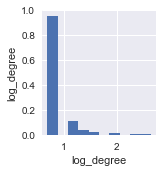

In [91]:
# Logging these two for easier relationship viewing.
graph_stats['log_degree']=np.log(graph_stats['degree']+1)

g = sns.pairplot(graph_stats,
                 vars=['log_degree'],
                 kind='scatter',
                plot_kws={'alpha':.3})
plt.show()